In [1]:
import numpy as np
from laspy.file import File
import matplotlib.pyplot as plt
inFile = File("../../../../NEON_Institute_2018/data/BC1_Down/BC1_Down/Photoscan_output/BC1_down.las", mode = "r")

In [2]:
# Grab all of the points from the file.
point_records = inFile.points
point_records

array([((579404, 645876,  973773,  7967, 73, 0, 0, 0, 1,  7967,  7967,  9509),),
       ((580090, 645537,  974054,  6425, 73, 0, 0, 0, 1,  6168,  6682,  7967),),
       ((579010, 644826,  973767,  7453, 73, 0, 0, 0, 1,  6939,  7710,  8995),),
       ...,
       ((913224, 953658, 1041633, 17990, 73, 0, 0, 0, 1, 19532, 17733, 16448),),
       ((912995, 954376, 1041848, 39578, 73, 0, 0, 0, 1, 41377, 39321, 36751),),
       ((912481, 954253, 1041462, 36751, 73, 0, 0, 0, 1, 37265, 37265, 34181),)],
      dtype=[('point', [('X', '<i4'), ('Y', '<i4'), ('Z', '<i4'), ('intensity', '<u2'), ('flag_byte', 'u1'), ('raw_classification', 'u1'), ('scan_angle_rank', 'i1'), ('user_data', 'u1'), ('pt_src_id', '<u2'), ('red', '<u2'), ('green', '<u2'), ('blue', '<u2')])])

In [3]:
# Find out what the point format looks like.
pointformat = inFile.point_format
for spec in inFile.point_format:
    print(spec.name)

X
Y
Z
intensity
flag_byte
raw_classification
scan_angle_rank
user_data
pt_src_id
red
green
blue


In [4]:
#Lets take a look at the header also.
headerformat = inFile.header.header_format
for spec in headerformat:
    print(spec.name)

file_sig
file_source_id
global_encoding
proj_id_1
proj_id_2
proj_id_3
proj_id_4
version_major
version_minor
system_id
software_id
created_day
created_year
header_size
data_offset
num_variable_len_recs
data_format_id
data_record_length
point_records_count
point_return_count
x_scale
y_scale
z_scale
x_offset
y_offset
z_offset
x_max
x_min
y_max
y_min
z_max
z_min


#### We can easily figure out which points are the last return by finding out for which points return_num is equal to num_returns.

In [5]:
# Grab the return_num and num_returns dimensions
num_returns = inFile.num_returns
return_num = inFile.return_num
ground_points = inFile.points[num_returns == return_num]

print("%i points out of %i were ground points." % (len(ground_points),
        len(inFile)))

30074642 points out of 30074642 were ground points.


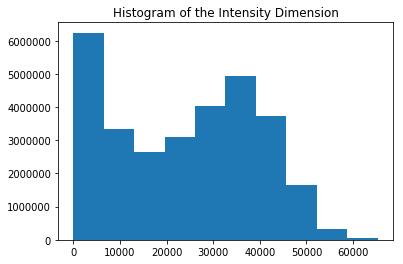

In [6]:
plt.hist(inFile.intensity)
plt.title("Histogram of the Intensity Dimension")
plt.show()